In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

Import the dataframe and drop the bad rows. Show dataframe's head. 

In [ ]:
car_prices_df = pd.read_csv('car_prices.csv', on_bad_lines='drop').dropna()
car_prices_df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


# Exploratory Data Analysis

## Number of Datapoints for Each Car Brand (Make)
Check the number of data point for each car brand in the dataset and drop the brands with less than 1000 samples. 

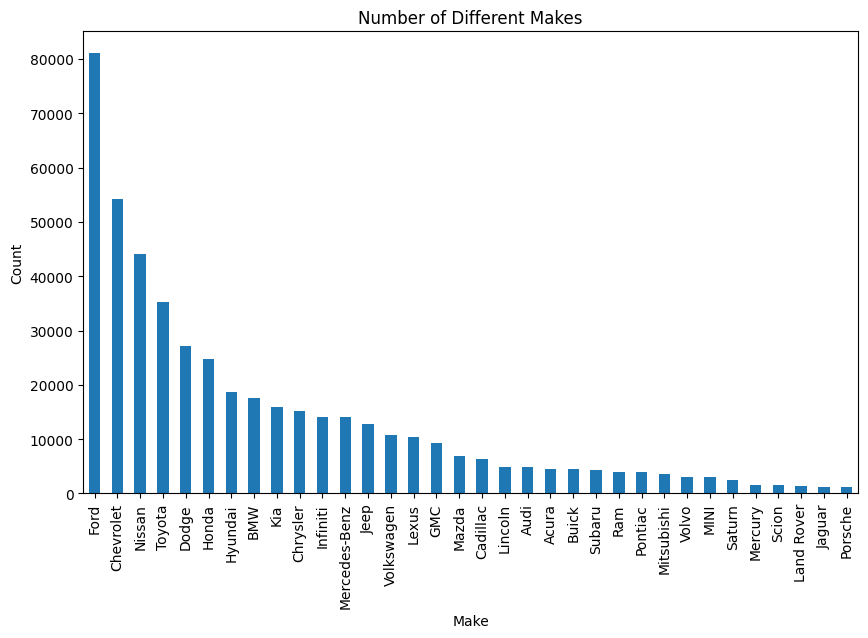

In [3]:
# Count the occurrences of each make
make_counts = car_prices_df['make'].value_counts()

make_counts = make_counts[make_counts >= 1000]

# Plot the result
make_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Different Makes')
plt.xlabel('Make')
plt.ylabel('Count')
plt.show()

## Visualization by Color
For each car brand, count the number of cars per color and plot the proportion of each color. 

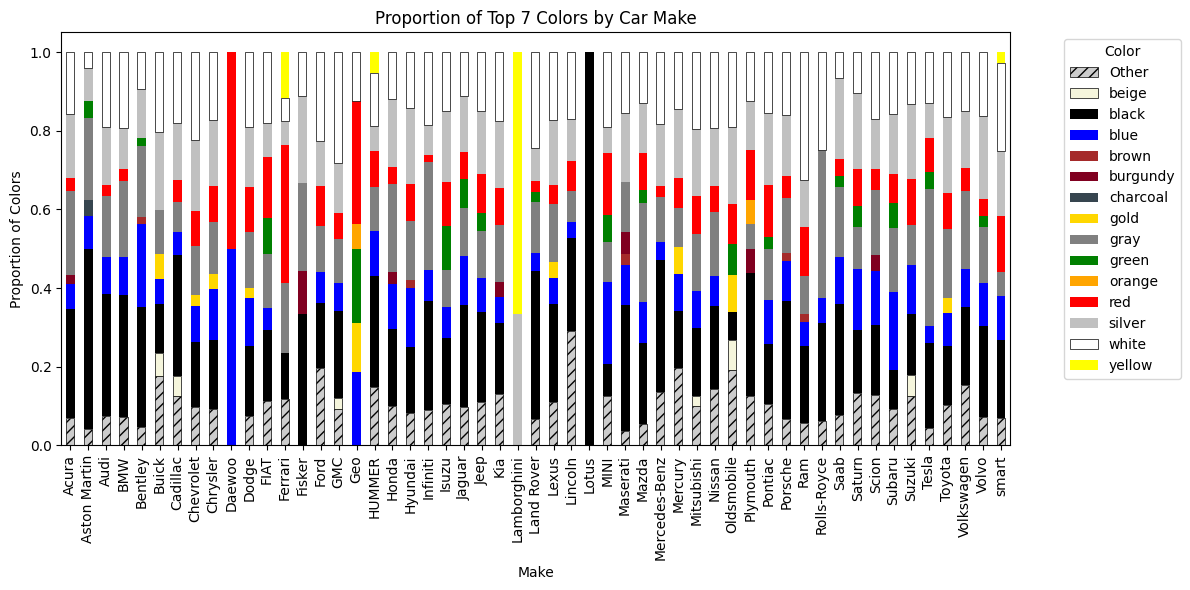

In [4]:
# Count the number of cars per make
make_counts = car_prices_df['make'].value_counts()

# Filter makes with at least one car (adjust threshold as needed)
valid_makes = make_counts[make_counts >= 1].index

# Filter DataFrame to include only valid makes
filtered_df = car_prices_df[car_prices_df['make'].isin(valid_makes)]

# Create a pivot table for color counts by make
color_counts = pd.pivot_table(filtered_df, values='vin', index='make',
                              columns='color', aggfunc='count',
                              fill_value=0)

# Ensure "_" is grouped into "Other"
color_counts['Other'] = color_counts.get('Other', 0) + color_counts.get('—', 0)
color_counts = color_counts.drop(columns='—', errors='ignore')

# Function to keep top 5 colors and group others
def top_5_colors(row):
    top_5 = row.nlargest(7)
    other_value = row.sum() - top_5.sum()
    if 'Other' in top_5.index:
        top_5['Other'] += other_value
    else:
        top_5 = pd.concat([top_5, pd.Series({'Other': other_value})])
    return top_5

# Apply the function to each row (make)
color_counts_top_5 = color_counts.apply(top_5_colors, axis=1)

# Normalize the color counts to get proportions
color_percentages = color_counts_top_5.div(color_counts_top_5.sum(axis=1), axis=0)

# Ensure "Other" colors are positioned at the top of the stacked bar graph
color_percentages = color_percentages[['Other'] + [col for col in color_percentages.columns if col != 'Other']] 

# Define a color map for actual colors, including setting a distinct color for 'Other' category
color_hex_map = {
    'Gray': '#808080',
    'White': '#FFFFFF',
    'Black': '#000000',
    'Red': '#FF0000',
    'Silver': '#C0C0C0',
    'Brown': '#A52A2A',
    'Beige': '#F5F5DC',
    'Blue': '#0000FF',
    '—': '#CCCCCC',  # Unknown color
    'Gold': '#FFD700',
    'Yellow': '#FFFF00',
    'Green': '#008000',
    'Burgundy': '#800020',
    'Charcoal': '#36454F',
    'Purple': '#800080',
    'Orange': '#FFA500',
    'Off-White': '#FAFAD2',
    'Turquoise': '#40E0D0',
    'Pink': '#FFC0CB',
    'Lime': '#00FF00',
    'Other': '#CCCCCC'  # Color for 'Other' category
}

# Get colors for the bars based on the column names (colors)
bar_colors = [color_hex_map.get(color.capitalize(), '#CCCCCC') for color in color_percentages.columns]

# Plot the stacked bar graph
ax = color_percentages.plot(kind='bar',
                            stacked=True,
                            figsize=(12, 6),
                            color=bar_colors)

# Add hatching for "Other" category bars
for bar_group, col_name in zip(ax.containers, color_percentages.columns):
    if col_name == "Other":
        for bar in bar_group:
            bar.set_hatch("///")  # Apply hatch pattern
            bar.set_edgecolor("black")  # Add edge color for better visibility
            bar.set_linewidth(0.5)  # Set edge thickness to match other bars
            bar.set_width(0.45)
    elif col_name == "white":
        for bar in bar_group:
            # bar.set_hatch("///")  # Apply hatch pattern
            bar.set_edgecolor("black")  # Add edge color for better visibility
            bar.set_linewidth(0.5)  # Set edge thickness to match other bars
            bar.set_width(0.45)
    elif col_name == "beige":
        for bar in bar_group:
            # bar.set_hatch("///")  # Apply hatch pattern
            bar.set_edgecolor("black")  # Add edge color for better visibility
            bar.set_linewidth(0.5)  # Set edge thickness to match other bars
            bar.set_width(0.45)


# Add labels and title
plt.title('Proportion of Top 7 Colors by Car Make')
plt.xlabel('Make')
plt.ylabel('Proportion of Colors')

# Customize legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels,
          title='Color',
          bbox_to_anchor=(1.05, 1),
          loc='upper left')

# Rotate x-axis labels for better readability
# plt.xticks( ha='right')
plt.tight_layout()

# Show plot
plt.show()

## Body Type Distribution
Count the overall distribution of body types in the dataset. 

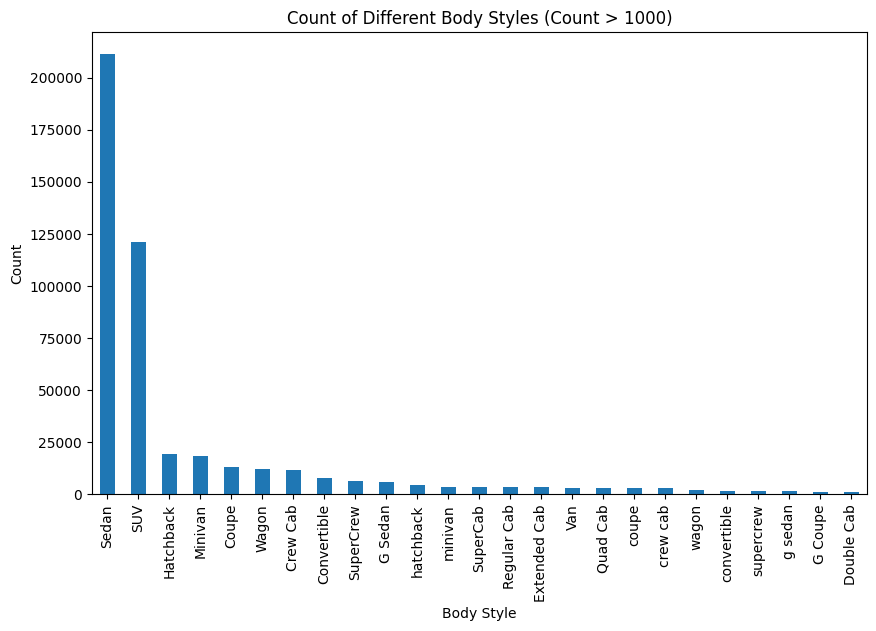

In [5]:
# Count the occurrences of each body style
body_style_counts = car_prices_df['body'].value_counts()

# Filter to include only body styles with count > 1000
body_style_counts = body_style_counts[body_style_counts > 1000]

# Merge body styles "SUV" and "suv", "Sedan" and "sedan"
car_prices_df['body'] = car_prices_df['body'].replace({'suv': 'SUV', 'sedan': 'Sedan'})
body_style_counts = car_prices_df['body'].value_counts()
body_style_counts = body_style_counts[body_style_counts > 1000]

# Plot the count of different body styles
plt.figure(figsize=(10, 6))
body_style_counts.plot(kind='bar')
plt.title('Count of Different Body Styles (Count > 1000)')
plt.xlabel('Body Style')
plt.ylabel('Count')
plt.show()


## Average Selling Price vs Year
Obviously we can see that the car prices depreciated over time approximately exponentially. 

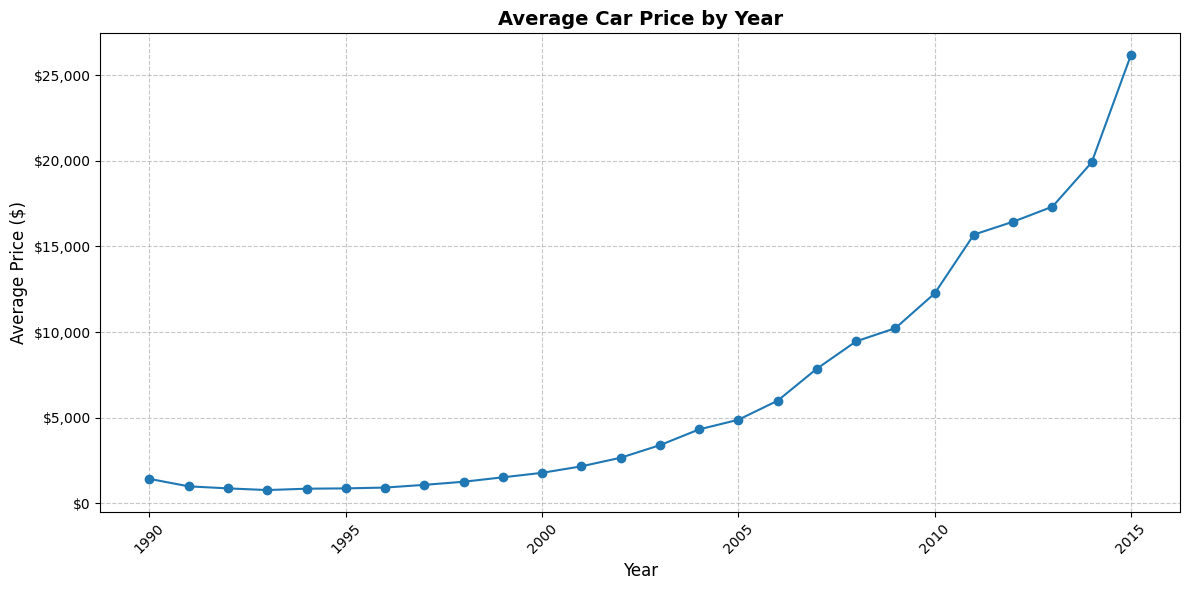


Average Price by Year:
1990: $1,429.55
1991: $994.61
1992: $874.74
1993: $777.36
1994: $856.47
1995: $875.93
1996: $922.86
1997: $1,081.33
1998: $1,262.23
1999: $1,520.47
2000: $1,783.16
2001: $2,161.77
2002: $2,662.82
2003: $3,395.43
2004: $4,317.72
2005: $4,881.96
2006: $5,993.04
2007: $7,861.24
2008: $9,458.50
2009: $10,227.30
2010: $12,254.81
2011: $15,690.07
2012: $16,441.72
2013: $17,318.88
2014: $19,902.24
2015: $26,168.99


In [6]:
# Calculate average price by year
yearly_avg_price = car_prices_df.groupby('year')['sellingprice'].mean().reset_index()

# Create the visualization
plt.figure(figsize=(12, 6))
plt.plot(yearly_avg_price['year'], yearly_avg_price['sellingprice'], marker='o')
plt.title('Average Car Price by Year', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)

# Format y-axis to show dollar amounts
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print the numerical values
print("\nAverage Price by Year:")
for _, row in yearly_avg_price.iterrows():
    print(f"{int(row['year'])}: ${row['sellingprice']:,.2f}")


# Corrolation Analysis
Now after visualizing the data, we can begin to build our model, with the selling prices as the target variable. To help building the model, we need to first check the corrolation between the features and the target variable.


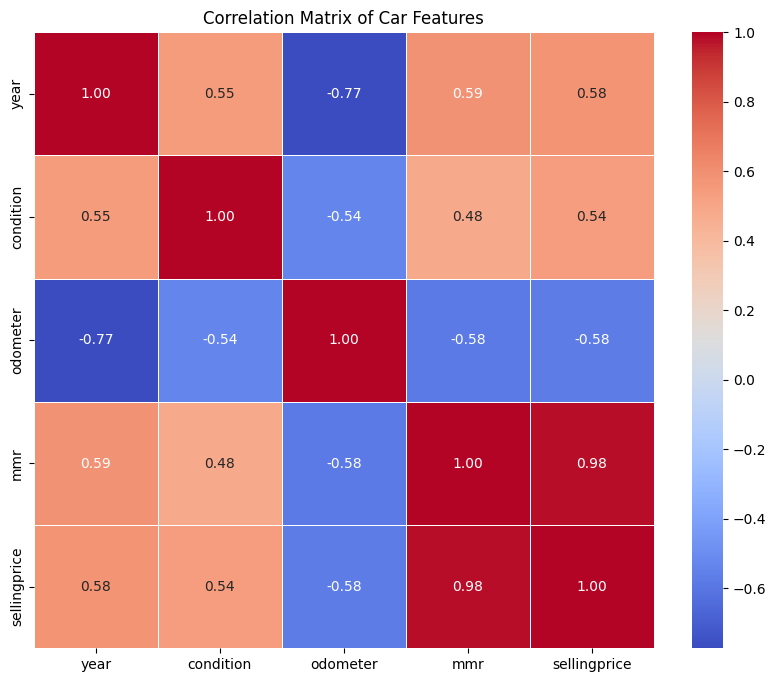

In [7]:

numeric_df = car_prices_df.select_dtypes(include=[np.number])  # Select only numeric columns
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Car Features')
plt.show()


Through the corrolation plot above, we can see that year and condition are positiely correlated with the selling price, while odometer is negatively correlated with the selling price. That means the more recent and the better the condition, the higher the selling price. Also the higher the odometer read, the lower the selling price. 

## Corrolation Pair Plot 
To get a better understanding of the corrolation between the features, we can plot the scatter plot for each feature against the selling price. 

<Figure size 1500x1500 with 0 Axes>

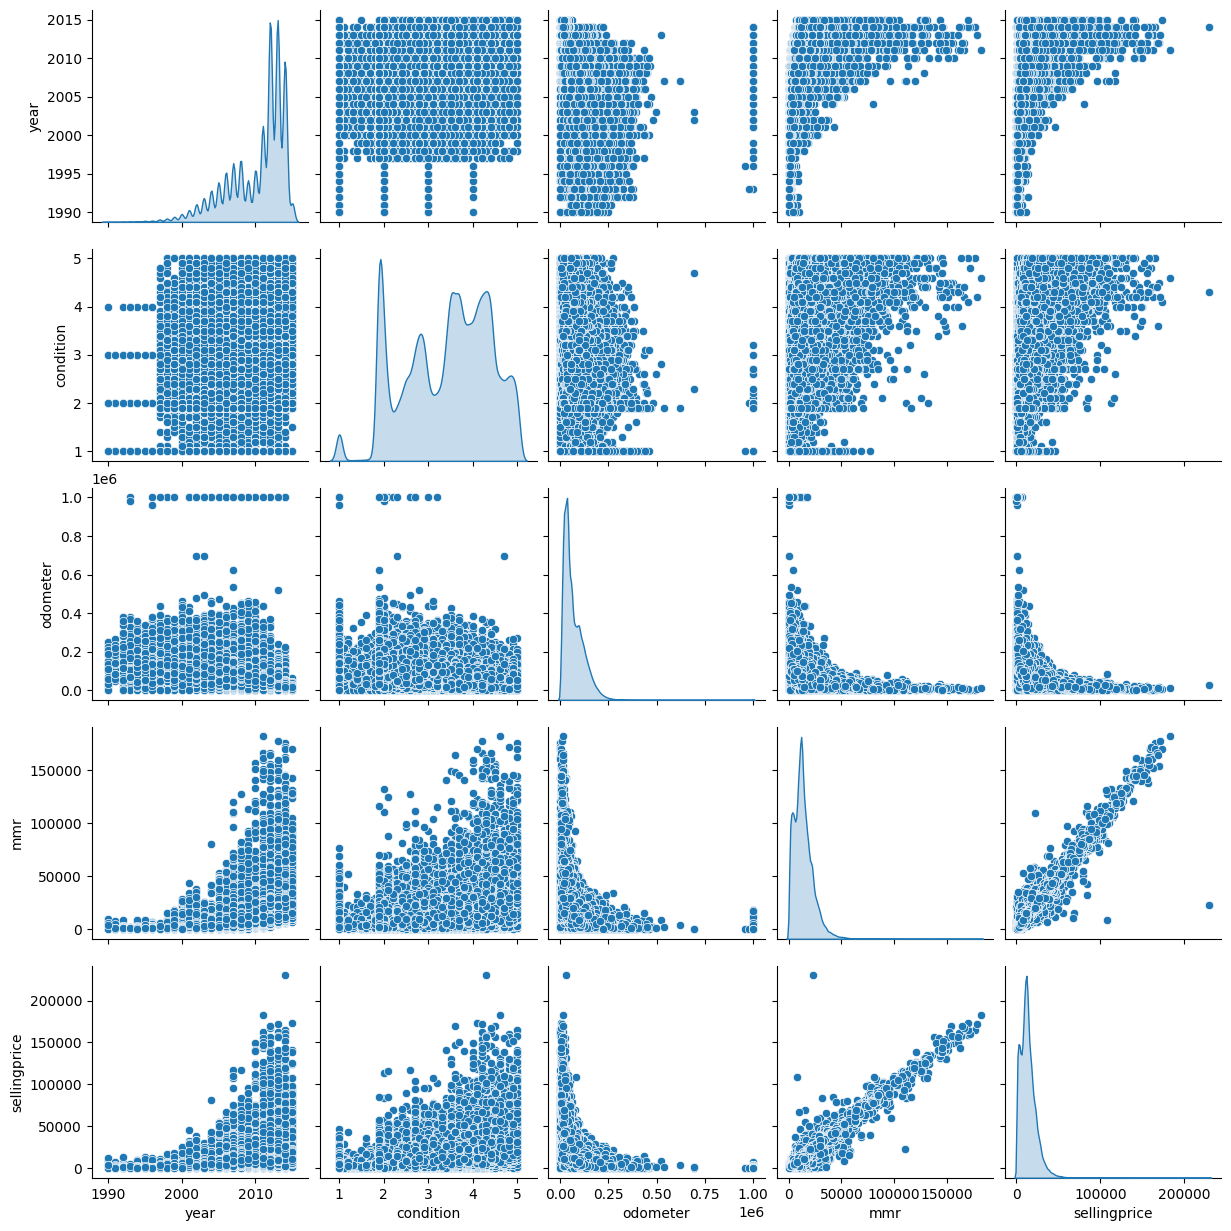

In [8]:
plt.figure(figsize=(15, 15))
sns.pairplot(numeric_df, diag_kind='kde');

## Odometer vs Price
Compared to other features, the odometer reading visualized in the above pair plot privides more information than other features. After plotting it, we can see that the upper bound of the odometer reading has a recipocal relationship with the selling price. 

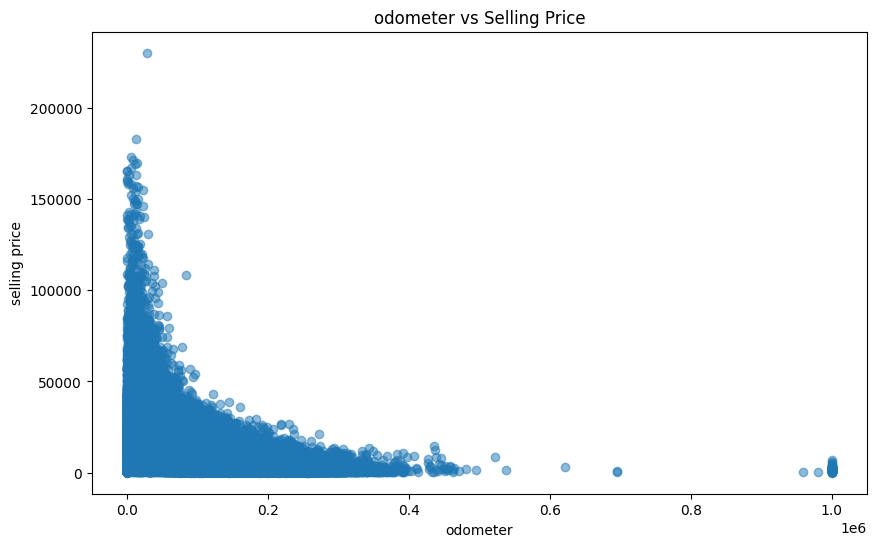

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(car_prices_df['odometer'], car_prices_df['sellingprice'], alpha=0.5)
plt.title('odometer vs Selling Price')
plt.xlabel('odometer')
plt.ylabel('selling price')
plt.show()

# Prediction
## Violin Plot of Price Distribution by Make
Now we can begin to build our model. Before this, we assume that each car make have very different price distributions, as visualized below. 

<Axes: xlabel='sellingprice', ylabel='make'>

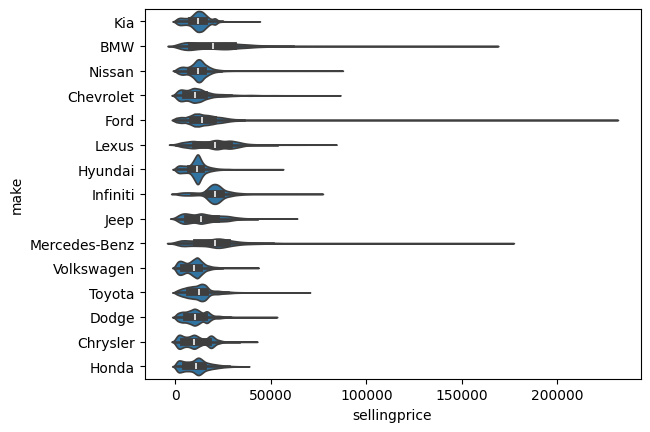

In [10]:
# because there are too many car makes, we only plot the violin plot for the popular ones (data count > 10k).
make_counts = car_prices_df['make'].value_counts()

# filter out the makes where the number of data points is larger than 10k
popular_makes = make_counts[make_counts > 10000].index

# filter the dataframe to only include the popular makes
popular_cars_df = car_prices_df[car_prices_df['make'].isin(popular_makes)]

sns.violinplot(y='make', x='sellingprice', data=popular_cars_df, width=1.2)

## Feature Importance
Also, we would like to visualize the weight of each feature contributing to the selling price prediction. We can measure this with the feature importance of the random forest model. 

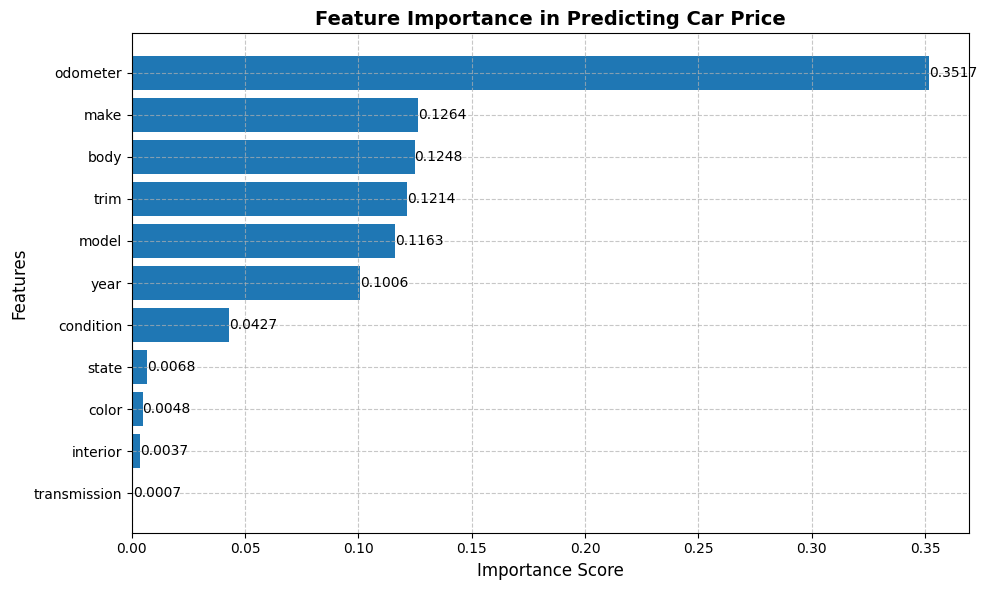


Feature Importance Scores:
transmission: 0.0007
interior: 0.0037
color: 0.0048
state: 0.0068
condition: 0.0427
year: 0.1006
model: 0.1163
trim: 0.1214
body: 0.1248
make: 0.1264
odometer: 0.3517


In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data
# Encode categorical variables
le = LabelEncoder()
df_encoded = car_prices_df.copy()
categorical_columns = ['make', 'model', 'trim', 'body', 'transmission', 'state', 'color', 'interior', 'seller']
for col in categorical_columns:
    df_encoded[col] = le.fit_transform(car_prices_df[col].astype(str))

# Select features
features = ['year', 'make', 'model', 'trim', 'body', 'transmission', 'state', 'condition', 'odometer', 'color', 'interior']
X = df_encoded[features]
y = df_encoded['sellingprice']

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importances
importances = rf_model.feature_importances_
feature_importance = pd.DataFrame({'feature': features, 'importance': importances})
feature_importance = feature_importance.sort_values('importance', ascending=True)

# Plot feature importances
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.title('Feature Importance in Predicting Car Price', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Add value labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, 
             f'{width:.4f}', 
             ha='left', va='center', fontsize=10)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nFeature Importance Scores:")
for idx, row in feature_importance.iterrows():
    print(f"{row['feature']}: {row['importance']:.4f}")

## Case Study: Polynomial Regression for Porsche


Mean Squared Error: 217384081.43755734
R² Score: 0.6160155685513339


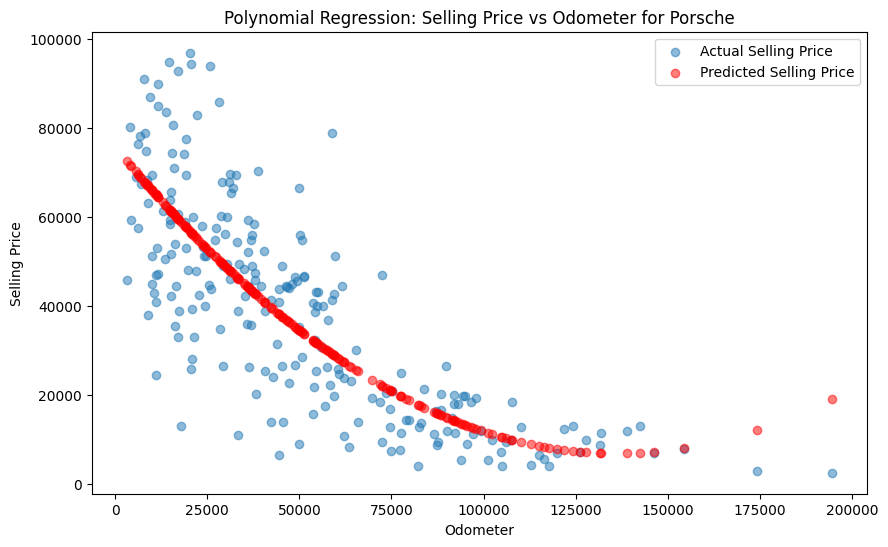

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Filter the dataframe to include only rows where make is 'Porsche'
porsche_df = car_prices_df[car_prices_df['make'] == 'Porsche']

# Prepare the data
X = porsche_df[['odometer']]
y = porsche_df['sellingprice']  # Selling price as the target for regression
actual_prices = porsche_df['sellingprice']  # Keep original prices for visualization

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, prices_train, prices_test = train_test_split(
    X, y, actual_prices, test_size=0.2, random_state=42
)

# Apply polynomial transformation
poly = PolynomialFeatures(degree=2)  # Degree can be adjusted
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Standardize the features
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

# Train a linear regression model on the polynomial features
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly_scaled, y_train)

# Make predictions
y_pred = poly_reg.predict(X_test_poly_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Plot the actual selling prices and predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(X_test['odometer'], prices_test, alpha=0.5, label='Actual Selling Price')
plt.scatter(X_test['odometer'], y_pred, alpha=0.5, label='Predicted Selling Price', color='red')
plt.title('Polynomial Regression: Selling Price vs Odometer for Porsche')
plt.xlabel('Odometer')
plt.ylabel('Selling Price')
plt.legend()
plt.show()


## Neural Network
We can also build a simple neural network model to predict the selling price. 

In [7]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from torch.utils.data import Dataset, DataLoader

from model import NeuralNet, LargerNeuralNet
from dswrap import CarDataset

# Check if CUDA is available
device = torch.device('cpu')
if torch.cuda.is_available():
    device = torch.device('cuda')
elif torch.backends.mps.is_available():
    device = torch.device('mps')

print(f"Using device: {device}")

# Load your dataframe (example provided here)
# df = pd.read_csv('your_dataset.csv')
df = car_prices_df

# Drop unused columns
df = df.drop(['mmr', 'sellingprice', 'vin', 'saledate'], axis=1)

# Handle categorical columns using Label Encoding
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].fillna("NA"))
    label_encoders[col] = le

# Handle numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(0)

# Separate features and target
X = df
y = car_prices_df['sellingprice']  # Replace YOUR_DATAFRAME_HERE

# Standardize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create datasets and data loaders
train_dataset = CarDataset(X_train, y_train)
test_dataset = CarDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


# Initialize the model, loss function, and optimizer
input_size = X_train.shape[1]
model = NeuralNet(input_size).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        # Forward pass
        outputs = model(X_batch).squeeze()
        loss = criterion(outputs, y_batch)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss / len(train_loader):.4f}")

# Evaluation
model.eval()
with torch.no_grad():
    y_pred = []
    y_true = []
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch).squeeze()
        y_pred.extend(outputs.cpu().numpy())
        y_true.extend(y_batch.cpu().numpy())

# Calculate RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"Test RMSE: {rmse:.2f}")


Using device: cuda
Epoch [1/50], Loss: 58008827.7916
Epoch [2/50], Loss: 46481349.3967
Epoch [3/50], Loss: 43244276.3298
Epoch [4/50], Loss: 41601430.5464
Epoch [5/50], Loss: 40235571.7079
Epoch [6/50], Loss: 39075741.6120
Epoch [7/50], Loss: 38112882.2754
Epoch [8/50], Loss: 37255104.9124
Epoch [9/50], Loss: 36491168.8259
Epoch [10/50], Loss: 35709134.6883
Epoch [11/50], Loss: 34839015.7641
Epoch [12/50], Loss: 33962064.8105
Epoch [13/50], Loss: 33233008.4310
Epoch [14/50], Loss: 32575934.7579
Epoch [15/50], Loss: 31994054.0981
Epoch [16/50], Loss: 31434053.3902
Epoch [17/50], Loss: 30912941.5828
Epoch [18/50], Loss: 30391197.1936
Epoch [19/50], Loss: 29918638.6287
Epoch [20/50], Loss: 29518457.1288
Epoch [21/50], Loss: 29125226.6401
Epoch [22/50], Loss: 28777119.2740
Epoch [23/50], Loss: 28431392.4073
Epoch [24/50], Loss: 28097277.6693
Epoch [25/50], Loss: 27789063.0248
Epoch [26/50], Loss: 27475824.1302
Epoch [27/50], Loss: 27151564.4188
Epoch [28/50], Loss: 26839561.7005
Epoch [29/

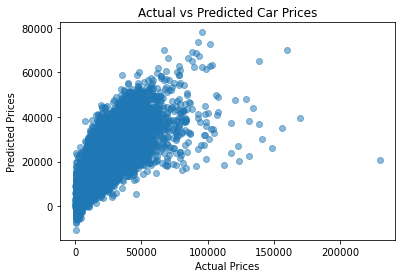

In [9]:
# Step 8: Visualization of Predictions
plt.scatter(y_true, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Car Prices")
plt.show()